# How to Use Poisson Distribution like You Know What You Are Doing
## Thankfully, there is Poisson distribution for these cases
<img src='images/jessica.jpg'></img>
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://www.pexels.com/@thepaintedsquare?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Bruno Bueno</a>
        on 
        <a href='https://www.pexels.com/photo/little-kid-wearing-virtual-reality-headset-while-playing-at-home-3405458/?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Pexels</a>
    </strong>
</figcaption>

### Setup

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

### The Story

You have been freelancing for 10 years now. So far, your average annual income was about 80,000$. This year, you feel like you are stuck in a rut and decide to hit 6 figures. To do that, you want to start by calculating the probability of this exciting achievement happening but you don't know how to do so. 

Turns out, you are not alone. In the world, there are many scenarios where there is a known rate of some random event and businessmen want to find the chance of the event happening more or less than this rate in the future. For example, retailer owners who already know their average sales would try to guess how much more they would make on special days such as on Black Fridays or Cyber Mondays. This would help them to store more products and manage their staff accordingly. 

In 1830, French statistician Siméon-Denis Poisson developed the famous **Poisson Probability Distribution**. This distribution and its related function has endless implications in science ranging from finding the probability of a large meteorite hitting the Earth to detecting mutation in biology. 

In this post, we will talk about the intuition behind the Poission distribution, how to understand and use its formula, and how to simulate it using Python code.

### Discrete Probability Distributions

> This post assumes you have a basic understanding of probability. If not, please check out this [great](https://towardsdatascience.com/probability-concepts-explained-introduction-a7c0316de465) article.

Before we get to the real meat of the article, we will build some understanding of discrete probability distributions. 

First, let's define what we mean by discrete. In descriptive statistics, discrete data is any data that is recorded or collected by counting, i. e. integers. Examples are test scores, number of cars in a parking lot, number of childbirths in a hospital, etc. 

Then, there are random experiments that have discrete outcomes. For example, a coin flip has two outcomes: heads and tails (1 and 0), rolling a die has 6 discrete outcomes and so on. If a random variable *X* is used to store all possible outcomes of a discrete experiment, it will have a discrete probability distribution. 

> Probability distribution records all possible outcomes of a random experiment.

As a trivial example, let's build the distribution of a single coin flip:

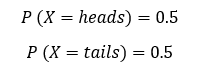

That was easy. If we want to record the distribution programmatically, it would be in the form of a Python list or Numpy array:

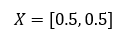

However, you can imagine that for large experiments that have many possible outcomes, building the distribution and finding the probabilities in this way becomes impossible. Thankfully, every probability distribution ever invented comes with their own formula to calculate any outcome's probability of a given experiment. For discrete probability distributions, these functions are called Probability Mass Functions (PMF). For a more detailed explanation, read my [previous post](https://towardsdatascience.com/how-to-think-probabilistically-with-discrete-distributions-ea28e2bcafdc) on discrete distributions.

We will talk more about PMFs later in the post.

### Poisson Distribution

We will start understanding the Poisson distribution using a case study. Say you really love watching new-born babies in a hospital. From your observations and reports, you know the hospital observes 6 new-born babies every hour on average. 

You find out that you have to go on a business trip tomorrow, so before leaving for airport, you want to visit the hospital for the last time. Since you will be gone for months, you want to see as many new babies as possible so you wonder about the chance of seeing 10 babies or more an hour before you flight.

If we consider observing new-born babies as a random experiment, the outcomes would follow a classic Poisson distribution. The reason is that it holds all the conditions required for a Poisson distribution:
- There is a known rate of events: 6 new babies every hour on average
- Evens occur independently: 1 baby being born does not affect the timing of the next
- The known rate is constant over time: average number of babies per hour does not chance through time
- Two events does not happen at exactly the same instant
- (Reminder: each outcome is discrete)

Poisson distribution has many important business implications. Businesses often use it to make forecasts about the number of sales or customers occurring on a particular day given that they know the average daily rate. Making such forecasts helps businesses to make better decisions about production, scheduling or staffing. For example, overstocking means losses for low activity in sales or not having enough goods also means lost business opportunity. 

In short, Poisson distribution helps find the probability of an event happening more or less than already recorded rate (often notated as *λ (lambda)*) in fixed time interval.

Its Probability Mass Function is given by this formula:

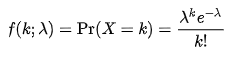

where 
- *k* is the number of successes (the number of times of a desired even happening)
- λ is the given rate
- *e* is Euler's number: e = 2.71828...
- *k!* is the factorial of *k*

> If you are still uncomfortable with PMFs, read my [previous post](https://towardsdatascience.com/how-to-think-probabilistically-with-discrete-distributions-ea28e2bcafdc).

Using this formula, we can find the probability of seeing 10 new-born babies knowing that the average rate is 6:

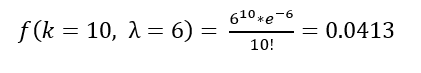

Unfortunately, there is only ~4% percent chance of seeing 10 babies. 
> We won't go into the detail of how the formula is derived but if you are curious, watch [this](https://www.khanacademy.org/math/statistics-probability/random-variables-stats-library/poisson-distribution/v/poisson-process-1) video by Khan Academy.

There are still some points you have to keep in mind. Even though there is a know rate, it is just an average, so the timing of the events can be completely random. For example, you can observe 2 babies born back-to-back or you may end up waiting for half an hour for the next. 

Also, in practice, the rate λ may not always be constant. This can be true for our new-born babies experiment. Even though this condition fails, we can still consider the distribution as Poisson because Poisson distribution is close enough to model the situation's behavior.

### Simulating the Poisson Distribution

Simulating or drawing samples from Poisson distribution is very easy using `numpy`. We first import it and use its `random` module for simulation:

In [2]:
import numpy as np

To draw samples from a Poisson distribution, we only need the rate parameter *λ*. We will plug it into `np.random.poisson` function and specify the number of samples:

In [3]:
poisson = np.random.poisson(lam=10, size=10000)

Here, we are simulating a distribution with rate 10 and has 10k data points. To see this distribution, we will plot the results of its PMF. Though we could do it by hand, there is already a very good library called `empiricaldist`, written by Allen B. Downey - author of well-known books such as *ThinkPython* and *ThinkStats*. We will install and import its `Pmf` function into our environment:

In [4]:
from empiricaldist import Pmf  # pip install empiricaldist

`Pmf` has a function called `from_seq` which takes any distribution and computes the PMF:

In [8]:
pmf_poisson = Pmf.from_seq(poisson)
pmf_poisson

,probs
1,0.0009
2,0.0027
3,0.0077
4,0.0203
5,0.0424
6,0.0609
7,0.0902
8,0.1086
9,0.1274
10,0.1305


Recall that PMF shows the probabilities of each unique outcome, so in the above result, the outcomes are given as index and probabilities under `probs`. Let's plot it using `matplotlib`:

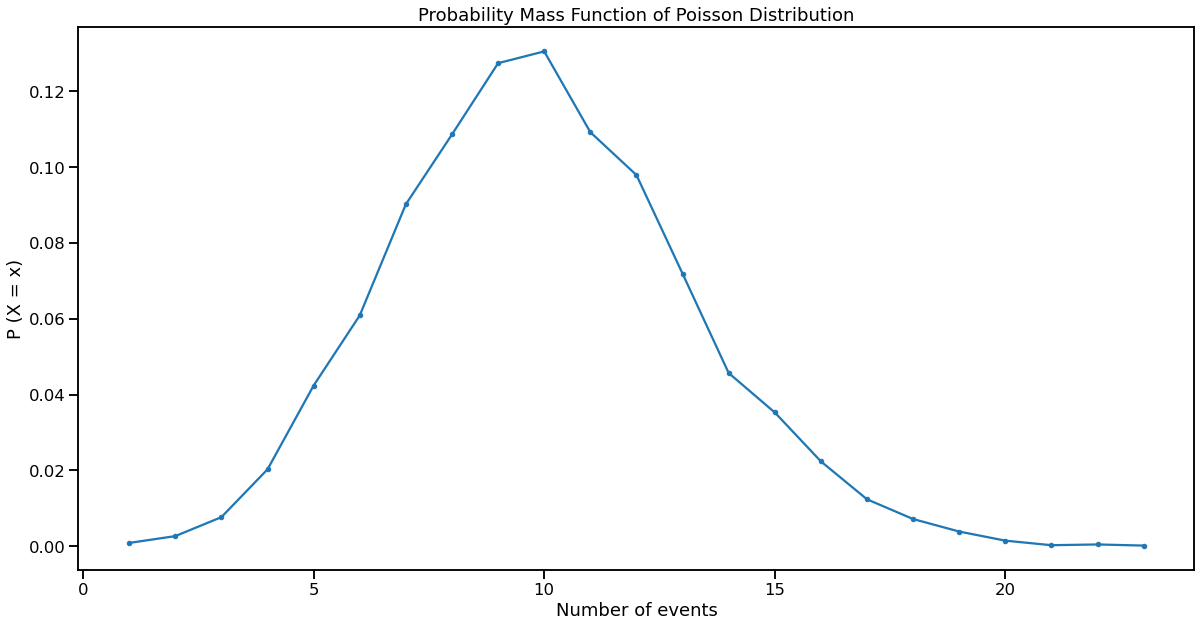

In [11]:
# Create figure and axes objects
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the PMF
ax.plot(pmf_poisson, marker='.')  # label each data point with a dot

# Labelling
ax.set(title='Probability Mass Function of Poisson Distribution',
       ylabel='P (X = x)', xlabel='Number of events')

plt.show();

As expected, the highest probability is for the mean (rate parameter, λ). 

Now, let's assume that we forgot the formula for the PMF of Poisson distribution. If we were doing our experiment of observing new-born babies, how would we find the probability of seeing 10 new babies with a rate of 6?

Well, to start off, we simulate the perfect Poisson distribution with our given rate as parameter. Also, we make sure to draw a lot of samples for better accuracy:

In [12]:
child_births = np.random.poisson(lam=6, size=1000000)

We are sampling a distribution with rate 6 and length of 1 million. Next, we find in how many of them we got 10 babies:

In [14]:
births_10 = np.sum(child_births == 10)
births_10

41114

So, we observed 10 babies in 41114 trials (each hour can be considered to have one trial). Then we divide this number by the total amount of samples:

In [15]:
births_10 / 1e6

0.041114

If you recall, using the PMF formula, the result was 0.0413 and we can see that our hand-coded solution is a pretty-close match.